In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("spotify_churn_dataset.csv")

In [4]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [5]:
df.shape

(8000, 12)

In [6]:
df.drop("user_id",inplace = True,axis = 1) #This column is not important

In [7]:
df.describe()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [8]:
df.columns

Index(['gender', 'age', 'country', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0
offline_listening,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8000 non-null   object 
 1   age                    8000 non-null   int64  
 2   country                8000 non-null   object 
 3   subscription_type      8000 non-null   object 
 4   listening_time         8000 non-null   int64  
 5   songs_played_per_day   8000 non-null   int64  
 6   skip_rate              8000 non-null   float64
 7   device_type            8000 non-null   object 
 8   ads_listened_per_week  8000 non-null   int64  
 9   offline_listening      8000 non-null   int64  
 10  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 687.6+ KB


Text(0.5, 1.0, 'Gender Distribution')

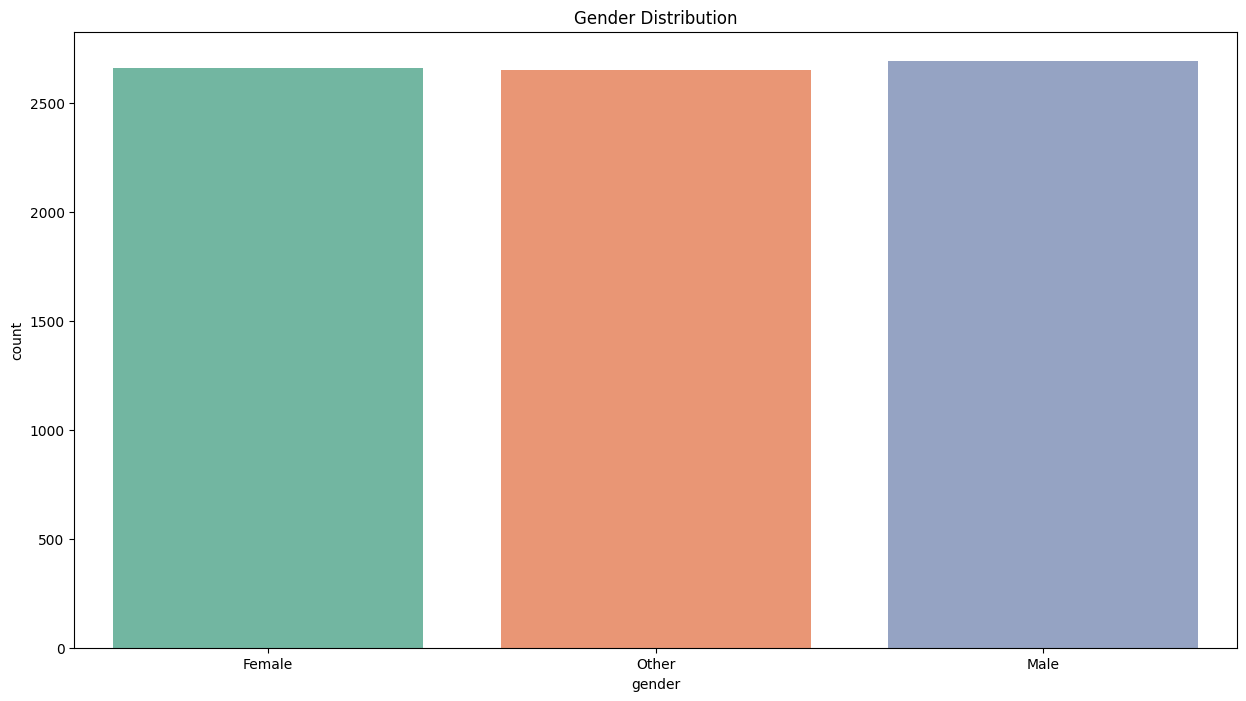

In [12]:
plt.figure(figsize = (15,8))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')

<Axes: xlabel='is_churned', ylabel='count'>

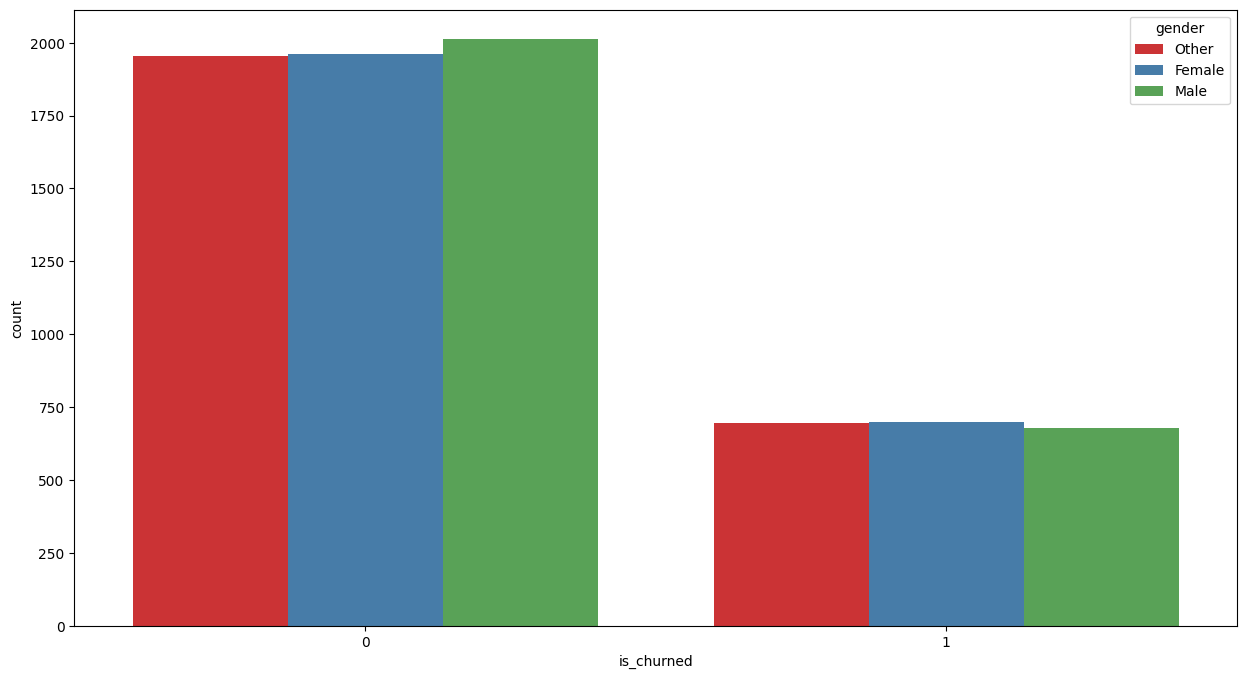

In [13]:
plt.figure(figsize = (15,8))
sns.countplot(x = "is_churned",hue = "gender",data = df,palette="Set1")

In [14]:
df.groupby('gender')[['listening_time', 'songs_played_per_day', 'skip_rate']].mean()

,listening_time,songs_played_per_day,skip_rate
gender,,,
Female,153.860850,49.684092,0.301455
Male,153.623188,50.128577,0.295682
Other,154.728302,50.570566,0.303309


<Axes: xlabel='age', ylabel='Count'>

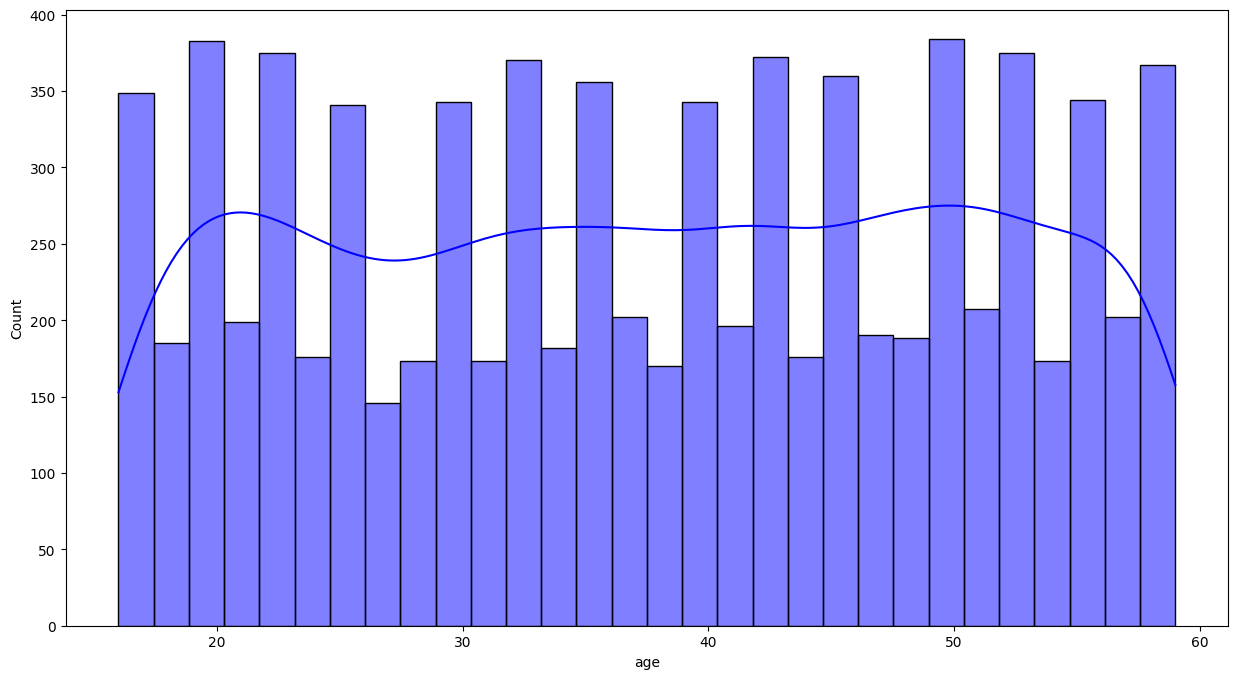

In [15]:
plt.figure(figsize = (15,8))
sns.histplot(x = "age",data = df,kde = True,color = "b",bins = 30)

Text(0.5, 1.0, 'Age vs Churn Status')

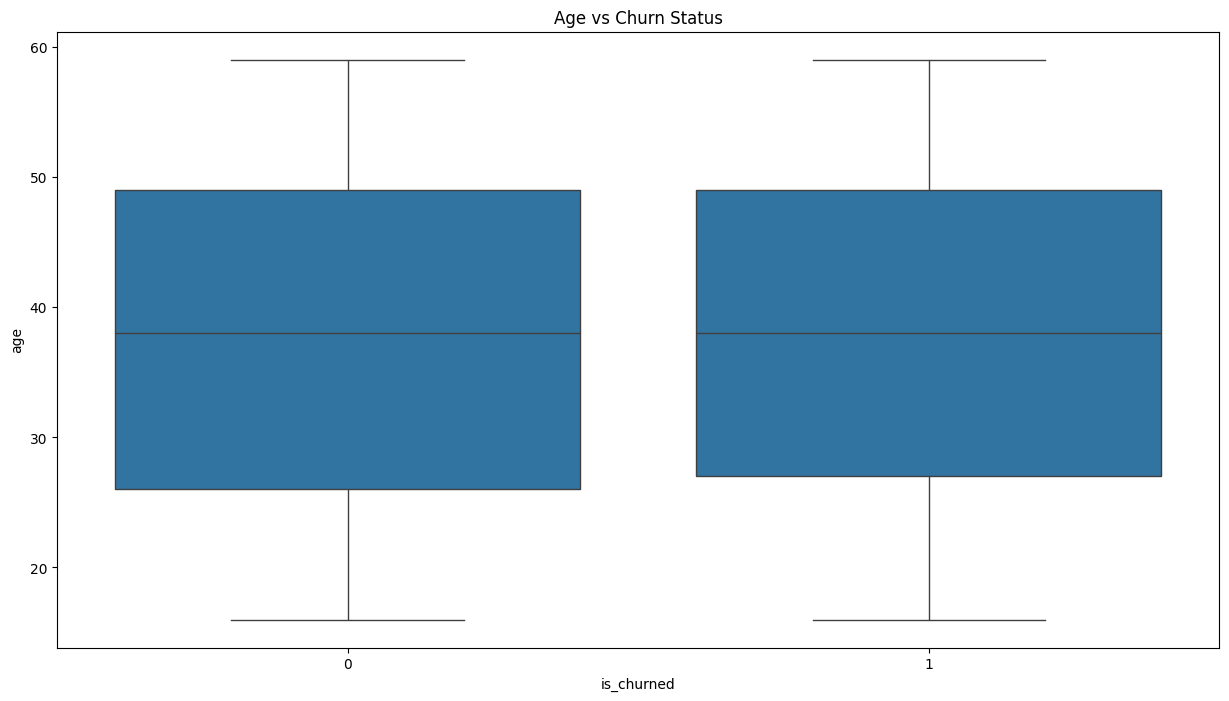

In [16]:
plt.figure(figsize = (15,8))
sns.boxplot(x='is_churned', y='age', data=df)
plt.title('Age vs Churn Status')


In [17]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 20, 30, 40, 50, 60, 100],
    labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+']
)


Text(0.5, 1.0, 'Subscription Type Distribution by Age Group')

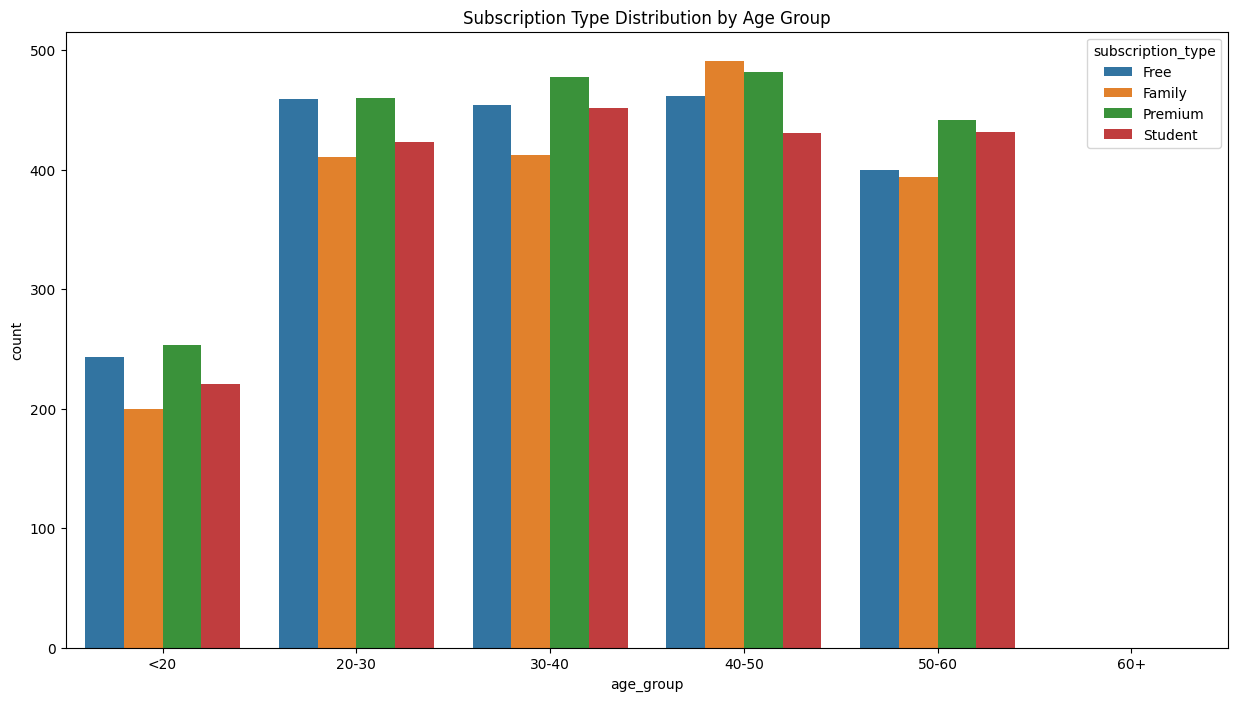

In [18]:
plt.figure(figsize = (15,8))
sns.countplot(x='age_group', hue='subscription_type', data=df)
plt.title('Subscription Type Distribution by Age Group')


Text(0.5, 1.0, 'Subscription Type Distribution by Age Group')

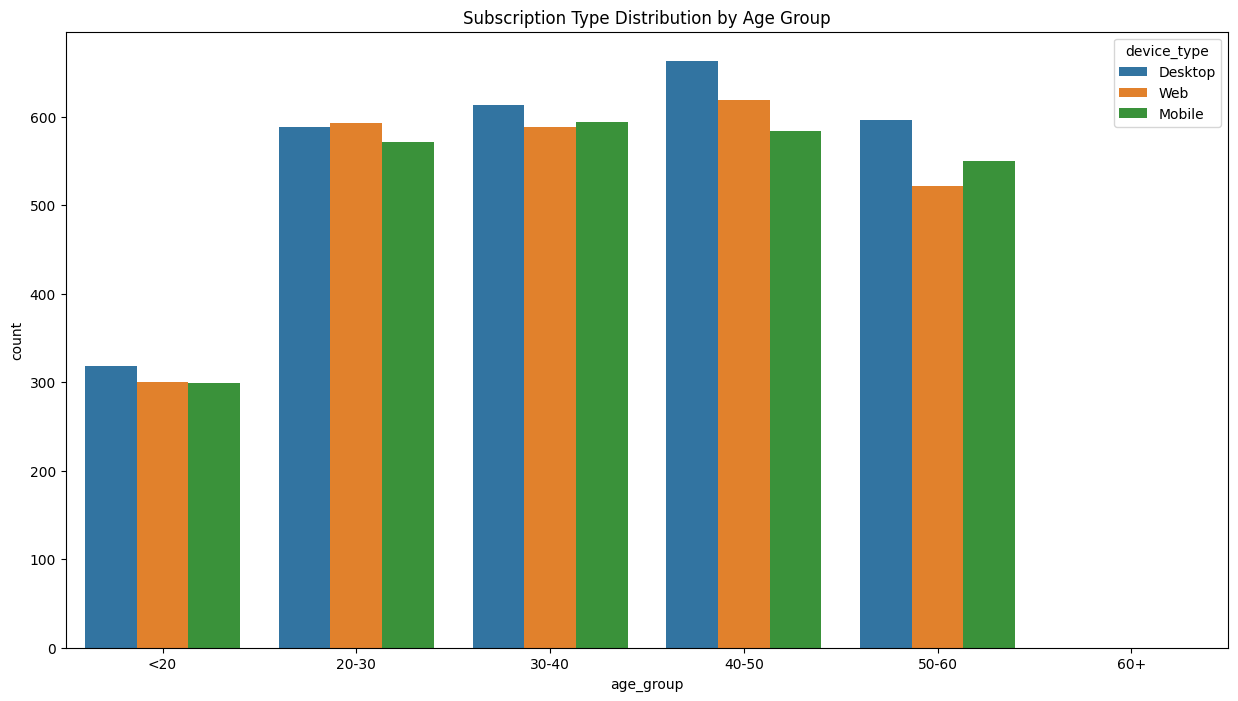

In [19]:
plt.figure(figsize = (15,8))
sns.countplot(x='age_group', hue='device_type', data=df)
plt.title('Subscription Type Distribution by Age Group')

<Axes: xlabel='country', ylabel='count'>

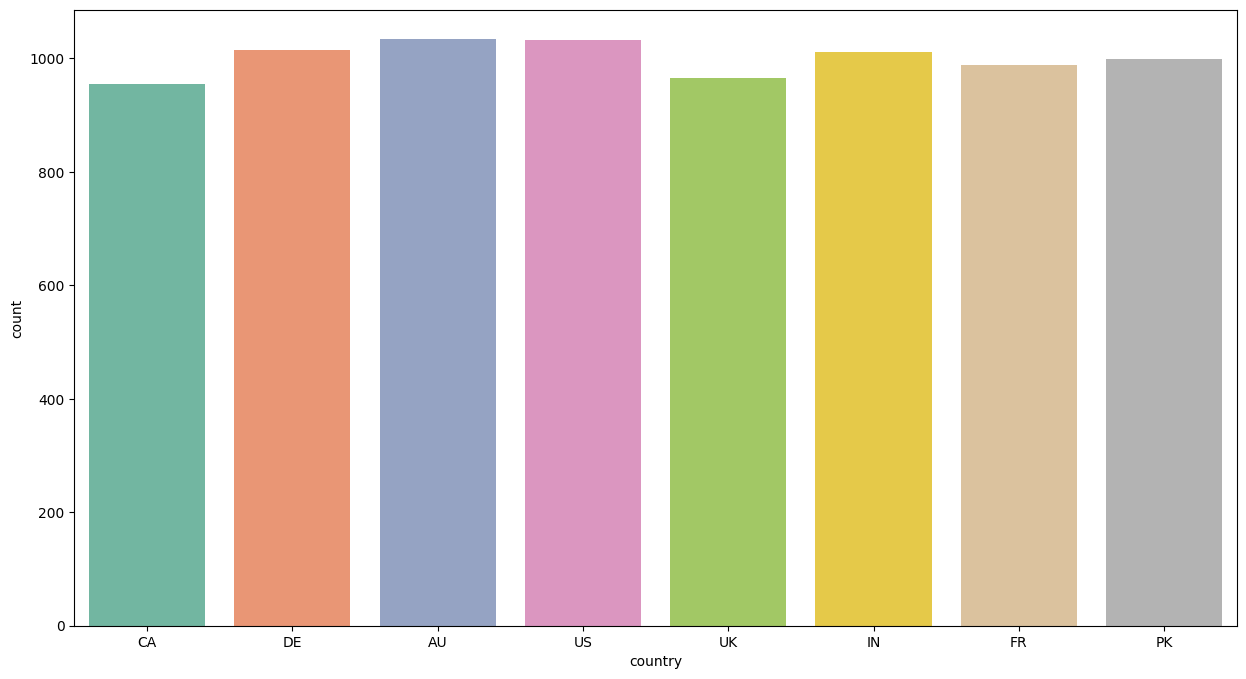

In [20]:
plt.figure(figsize = (15,8))
sns.countplot(x = "country",data = df,palette = "Set2")

<Axes: xlabel='is_churned', ylabel='count'>

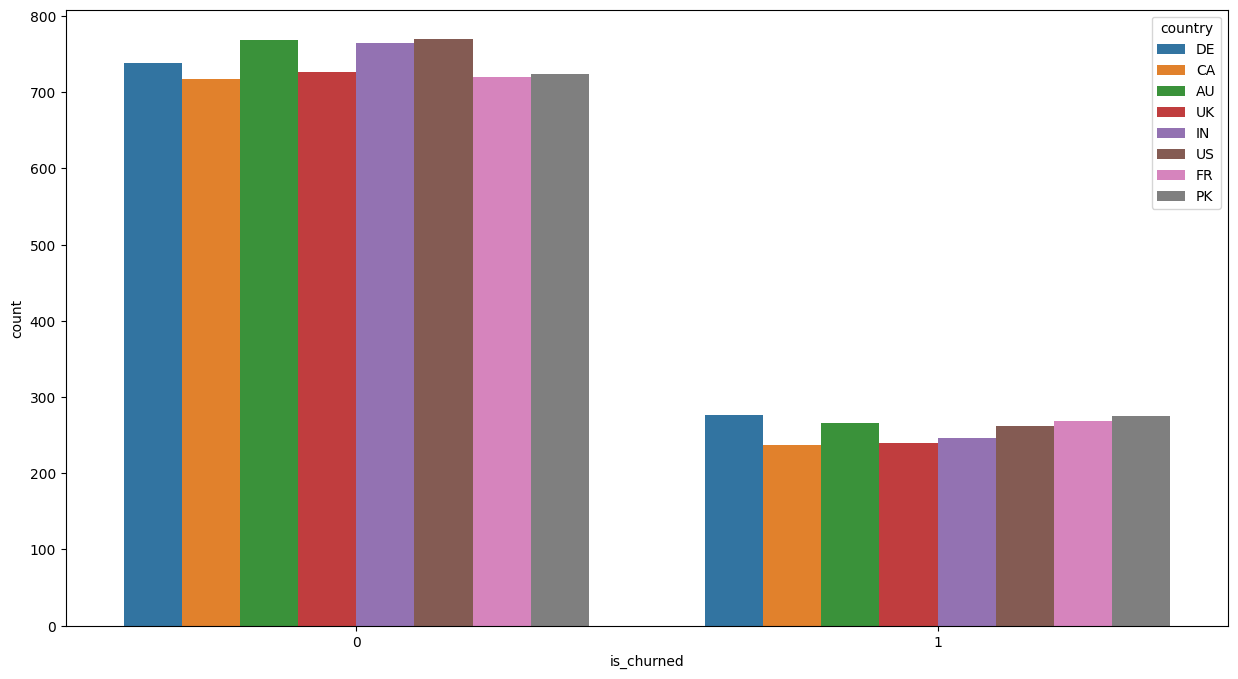

In [21]:
plt.figure(figsize = (15,8))
sns.countplot(x = "is_churned",hue = "country",data = df)

In [22]:
df.groupby('country')[['listening_time', 'songs_played_per_day', 'skip_rate']].mean()

,listening_time,songs_played_per_day,skip_rate
country,,,
AU,151.930368,49.751451,0.296954
CA,152.407757,52.039832,0.305409
DE,157.229557,48.901478,0.305251
FR,155.319515,50.821031,0.304095
IN,154.695351,49.869436,0.302057
PK,152.779780,51.919920,0.299910
UK,153.145963,49.116977,0.297899
US,154.933140,48.739341,0.289990


Text(0.5, 1.0, 'Correlation Heatmap')

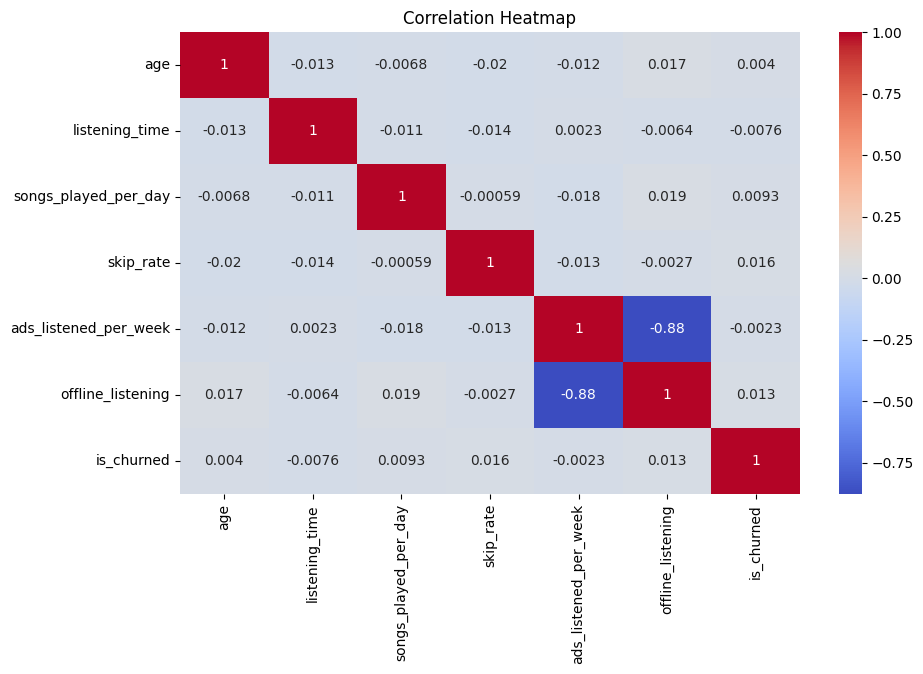

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

In [24]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]

In [25]:
df[categorical_columns].nunique()

,0
gender,3
country,8
subscription_type,4
device_type,3


In [26]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype="int64")

In [27]:
df.drop("age_group",inplace=True,axis = 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        8000 non-null   int64  
 1   listening_time             8000 non-null   int64  
 2   songs_played_per_day       8000 non-null   int64  
 3   skip_rate                  8000 non-null   float64
 4   ads_listened_per_week      8000 non-null   int64  
 5   offline_listening          8000 non-null   int64  
 6   is_churned                 8000 non-null   int64  
 7   gender_Male                8000 non-null   int64  
 8   gender_Other               8000 non-null   int64  
 9   country_CA                 8000 non-null   int64  
 10  country_DE                 8000 non-null   int64  
 11  country_FR                 8000 non-null   int64  
 12  country_IN                 8000 non-null   int64  
 13  country_PK                 8000 non-null   int64

# **Machine Learning**

In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,ElasticNet,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [30]:
X = df.drop("is_churned",axis = 1)
Y = df["is_churned"]
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(scale_pos_weight="ratio"),
    LGBMClassifier()
]

In [34]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    report = classification_report(true, predicted)
    Conf = confusion_matrix(true, predicted)
    return accuracy,report,Conf

---LogisticRegression() results---:
Model performance for Training Set
Accuracy Score:  0.7543748682268606
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7521079258010118
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.83      0.77      1207
           1       0.79      0.67      0.73      1165

    accuracy                           0.75      2372
   macro avg       0.76      0.75      0.75      2372
weighted avg       0.76      0.75      0.75      2372

Confusion Matrix: 


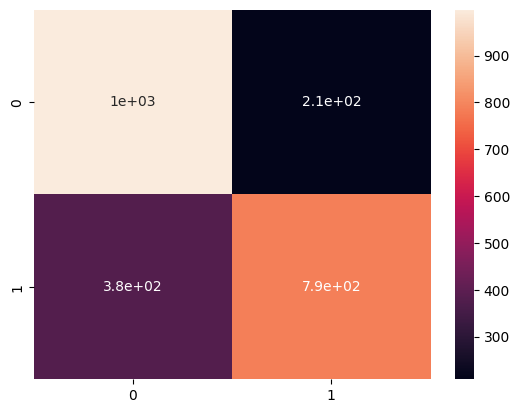

-----------------------------------




In [35]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

---KNeighborsClassifier() results---:
Model performance for Training Set
Accuracy Score:  0.8116171199662661
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7268128161888702
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.75      0.74      1207
           1       0.73      0.70      0.72      1165

    accuracy                           0.73      2372
   macro avg       0.73      0.73      0.73      2372
weighted avg       0.73      0.73      0.73      2372

Confusion Matrix: 


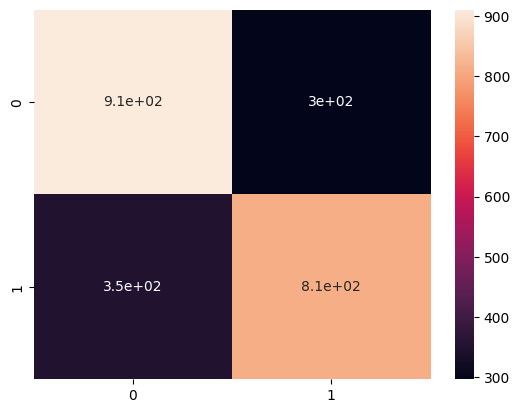

-----------------------------------




In [36]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

---SVC() results---:
Model performance for Training Set
Accuracy Score:  0.7682901117436222
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7580101180438449
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.86      0.78      1207
           1       0.82      0.65      0.73      1165

    accuracy                           0.76      2372
   macro avg       0.77      0.76      0.75      2372
weighted avg       0.77      0.76      0.76      2372

Confusion Matrix: 


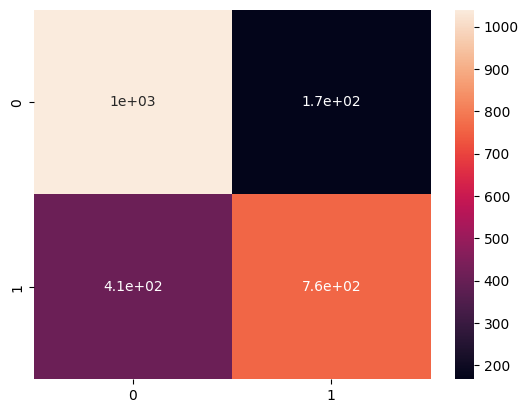

-----------------------------------




In [37]:
model = SVC()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

---DecisionTreeClassifier() results---:
Model performance for Training Set
Accuracy Score:  1.0
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.684654300168634
Classification Report:                precision    recall  f1-score   support

           0       0.70      0.67      0.68      1207
           1       0.67      0.70      0.69      1165

    accuracy                           0.68      2372
   macro avg       0.69      0.68      0.68      2372
weighted avg       0.69      0.68      0.68      2372

Confusion Matrix: 


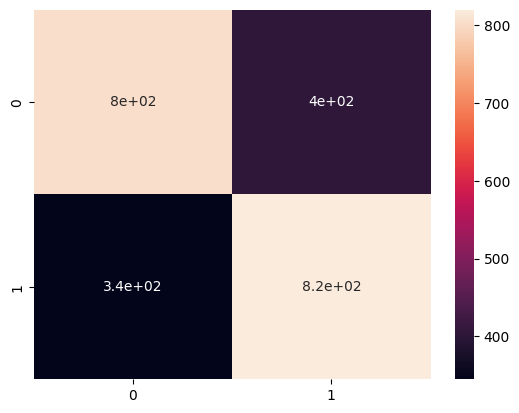

-----------------------------------




In [38]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

---RandomForestClassifier() results---:
Model performance for Training Set
Accuracy Score:  1.0
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7660202360876898
Classification Report:                precision    recall  f1-score   support

           0       0.74      0.84      0.79      1207
           1       0.81      0.69      0.74      1165

    accuracy                           0.77      2372
   macro avg       0.77      0.76      0.76      2372
weighted avg       0.77      0.77      0.76      2372

Confusion Matrix: 


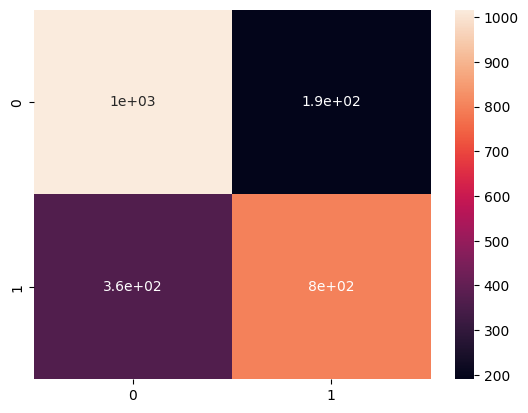

-----------------------------------




In [39]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

---AdaBoostClassifier() results---:
Model performance for Training Set
Accuracy Score:  0.7141049968374447
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.715008431703204
Classification Report:                precision    recall  f1-score   support

           0       0.74      0.68      0.71      1207
           1       0.69      0.75      0.72      1165

    accuracy                           0.72      2372
   macro avg       0.72      0.72      0.71      2372
weighted avg       0.72      0.72      0.71      2372

Confusion Matrix: 


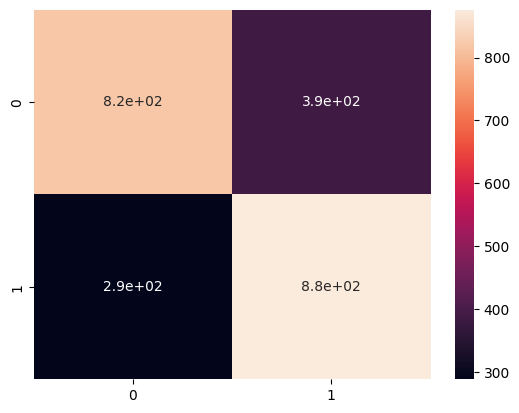

-----------------------------------




In [40]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

---GradientBoostingClassifier() results---:
Model performance for Training Set
Accuracy Score:  0.7651275563989036
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7512647554806071
Classification Report:                precision    recall  f1-score   support

           0       0.73      0.80      0.77      1207
           1       0.77      0.70      0.73      1165

    accuracy                           0.75      2372
   macro avg       0.75      0.75      0.75      2372
weighted avg       0.75      0.75      0.75      2372

Confusion Matrix: 


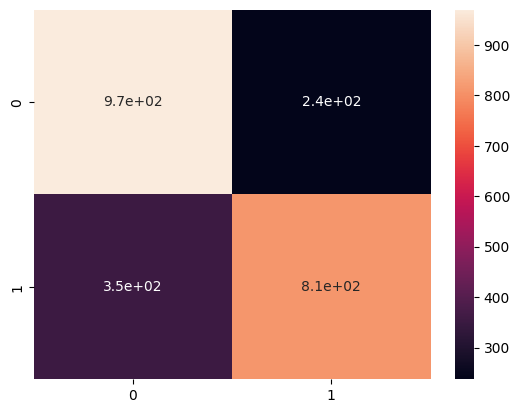

-----------------------------------




In [41]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

---XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) results---:
Model performance for Training Set
Accuracy Score:  0.9312671305081173
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7567453625632378
Classification Report:                precision   

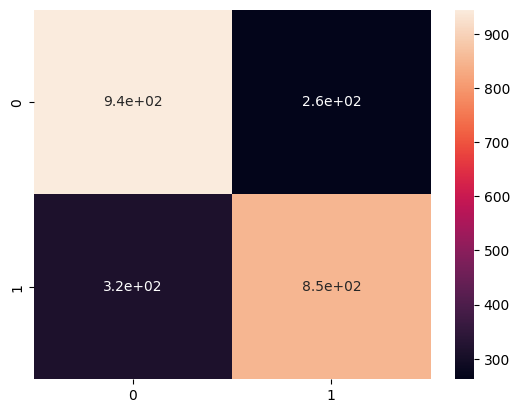

-----------------------------------




In [42]:
model = XGBClassifier()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

[LightGBM] [Info] Number of positive: 4764, number of negative: 4722
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 744
[LightGBM] [Info] Number of data points in the train set: 9486, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502214 -> initscore=0.008855
[LightGBM] [Info] Start training from score 0.008855
---LGBMClassifier() results---:
Model performance for Training Set
Accuracy Score:  0.8335441703563146
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7668634064080945
Classification Report:                precision    recall  f1-score   support

           0       0.74      0.84      0.79      1207
           1       0.81      0.69      0.74      1165

    accuracy                           0.77      2372


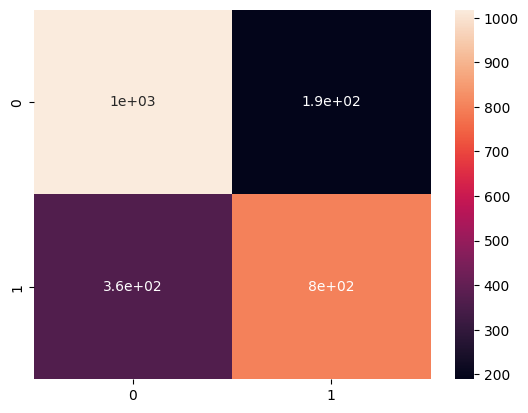

-----------------------------------




In [43]:
model = LGBMClassifier()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

# **HYPERPAREMETER TUNING**

In [44]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

lgbm_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "num_iterations": [500, 1000, 1500],
    "num_leaves": [31, 63, 127],
    "max_depth": [5, 10, 15],
    "max_bin" : [255,511,1023]
}


In [76]:
random_search = RandomizedSearchCV(
    estimator=LGBMClassifier(verbose = -1),
    param_distributions=lgbm_params,
    scoring='accuracy',
    cv=5,
    n_iter=10,
    n_jobs=-1)
random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'num_leaves': 31, 'num_iterations': 1000, 'max_depth': 10, 'max_bin': 1023, 'learning_rate': 0.05}
Best Score: 0.7770385051434439


---LGBMClassifier(learning_rate=0.05, max_bin=1023, max_depth=10,
               num_iterations=1000, verbose=-1) results---:
Model performance for Training Set
Accuracy Score:  0.9764916719375922
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7782462057335582
Classification Report:                precision    recall  f1-score   support

           0       0.75      0.84      0.79      1207
           1       0.81      0.72      0.76      1165

    accuracy                           0.78      2372
   macro avg       0.78      0.78      0.78      2372
weighted avg       0.78      0.78      0.78      2372

Confusion Matrix: 


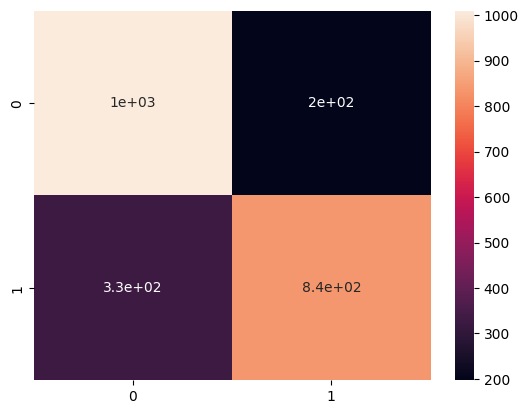

-----------------------------------




In [80]:
model = LGBMClassifier(
    num_leaves=31,
    max_depth=10,
    max_bin = 1023,
    learning_rate=0.05,
    num_iterations=1000,
    verbose=-1
)

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")

In [81]:
xgb_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [500, 1000, 1500],
    "max_depth": [5, 10, 15],
    "subsample": [0.7, 0.8, 0.9],
}

In [82]:
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=xgb_params,
    scoring='accuracy',
    cv=5,
    n_iter=10,
    n_jobs=-1)
random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.9, 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.01}
Best Score: 0.7785145199035914


---XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1500,
              n_jobs=None, num_parallel_tree=None, ...) results---:
Model performance for Training Set
Accuracy Score:  0.9937803078220535
-----------------------------------
Model performance for Test Set
Accuracy Score:  0.7866779089376054
Classification Report:                precision    r

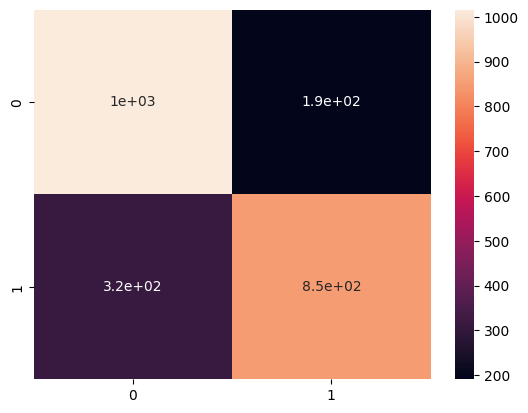

-----------------------------------




In [84]:
model = XGBClassifier(
    max_depth = 10,
    subsample= 0.9,
    learning_rate=0.01,
    n_estimators = 1500,
    verbose=-1
)

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy,report,CONF = evaluate_model(y_train, y_train_pred)
accuracy_score_test,report_test,CONF_test = evaluate_model(y_test, y_test_pred)

print(f"---{model} results---:")

print("Model performance for Training Set")
print("Accuracy Score: ", accuracy)
print("-----------------------------------")
print("Model performance for Test Set")
print("Accuracy Score: ", accuracy_score_test)
print("Classification Report: ", report_test)
print("Confusion Matrix: ")
sns.heatmap(CONF_test,annot = True)
plt.show()
print("-----------------------------------")
print("\n")